In [1]:
python -m pip install prophet
# conda install -c conda-forge prophet

!pip3 install yfinance -q --no-warn-script-location
# !conda install -c conda-forge yfinance
# !conda install conda-forge::yfinance

# conda install -c conda-forge frozendict

SyntaxError: invalid syntax (4172210379.py, line 1)

In [2]:
!pip3 install yfinance
!pip install -c conda-forge prophet

  Using cached yfinance-1.0-py2.py3-none-any.whl.metadata (6.0 kB)
  Using cached pandas-2.3.3-cp310-cp310-win_amd64.whl.metadata (19 kB)
  Using cached multitasking-0.0.12.tar.gz (19 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached peewee-3.19.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached curl_cffi-0.13.0-cp39-abi3-win_amd64.whl.metadata (13 kB)
Using cached yfinance-1.0-py2.py3-none-any.whl (127 kB)
Using cached curl_cffi-0.13.0-cp39-abi3-win_amd64.whl (1.6 MB)
Using cached pandas-2.3.3-cp310-cp310-win_amd64.whl (11.3 MB)
Using cached peewee-3.19.0-py3-none-any.whl (411 kB)
Using cached pytz-2025.2-py2.py3-none-any.whl 

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'conda-forge'


In [5]:
import pandas as pd
from prophet import Prophet
import cmdstanpy
import yfinance as yf
import matplotlib.pyplot as plt

c:\Users\sunba\anaconda3\envs\python10\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [6]:
# 我特!
yahoo = yf.Ticker("TSLA").history(period="max")
yahoo.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [7]:
# 下載特斯拉歷史數據 (抓取過去 5 年)
ticker = "TSLA"
data = yf.download(ticker, start="2021-01-01", end="2026-01-23")

# 查看數據前幾行
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2021-01-04  243.256668  248.163330  239.063339  239.820007  145914600
2021-01-05  245.036667  246.946671  239.733337  241.220001   96735600
2021-01-06  251.993332  258.000000  249.699997  252.830002  134100000
2021-01-07  272.013336  272.329987  258.399994  259.209991  154496700
2021-01-08  293.339996  294.829987  279.463318  285.333344  225166500


In [8]:
# 1. 將索引（日期）轉為普通欄位
df = data.reset_index()

# 2. 挑選需要的欄位並重新命名
# 注意：yf 抓下來的 columns 可能有層級，確保選到 'Date' 與 'Close'
df_prophet = df[['Date', 'Close']].copy()
df_prophet.columns = ['ds', 'y']

# 3. 移除時區資訊 (Prophet 有時會因為時區報錯)
df_prophet['ds'] = df_prophet['ds'].dt.tz_localize(None)

print(df_prophet.tail())

             ds           y
1264 2026-01-15  438.570007
1265 2026-01-16  437.500000
1266 2026-01-20  419.250000
1267 2026-01-21  431.440002
1268 2026-01-22  449.359985


In [9]:
# 初始化模型（開啟日、週、年季節性分析）
model = Prophet(daily_seasonality=True, yearly_seasonality=True, weekly_seasonality=True)
model.fit(df_prophet)

# 建立未來 30 天的空表格
future = model.make_future_dataframe(periods=30)

# 執行預測
forecast = model.predict(future)

# 查看預測結果 (yhat 是預測值，yhat_lower/upper 是信心區間)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

AttributeError: 'Prophet' object has no attribute 'stan_backend'

In [10]:

# 繪製預測圖
fig1 = model.plot(forecast)
plt.title(f"{ticker} Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

# 繪製成分圖（觀察週、年趨勢）
fig2 = model.plot_components(forecast)
plt.show()

NameError: name 'model' is not defined

<Axes: xlabel='Date'>

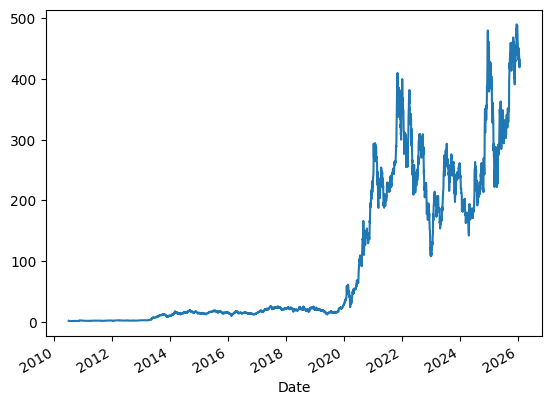

In [5]:
yahoo['Close'].plot()

In [6]:
yahoo.reset_index(inplace=True, drop=False)

In [7]:
yahoo.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
3903,2026-01-05 00:00:00-05:00,447.989990,457.549988,444.570007,451.670013,67940800,0.0,0.0
3904,2026-01-06 00:00:00-05:00,446.380005,448.250000,428.779999,432.959991,89093800,0.0,0.0
3905,2026-01-07 00:00:00-05:00,435.899994,438.369995,431.290009,431.410004,59828800,0.0,0.0
3906,2026-01-08 00:00:00-05:00,427.890015,436.890015,424.369995,435.799988,57041100,0.0,0.0
3907,2026-01-09 00:00:00-05:00,435.950012,449.049988,430.390015,445.010010,67185700,0.0,0.0


In [8]:
df = yahoo[['Date', 'Close']].set_axis(['ds', 'y'], axis='columns')

In [9]:
df.head()

,ds,y
0,2010-06-29 00:00:00-04:00,1.592667
1,2010-06-30 00:00:00-04:00,1.588667
2,2010-07-01 00:00:00-04:00,1.464000
3,2010-07-02 00:00:00-04:00,1.280000
4,2010-07-06 00:00:00-04:00,1.074000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3908 entries, 0 to 3907
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype                           
---  ------  --------------  -----                           
 0   ds      3908 non-null   datetime64[ns, America/New_York]
 1   y       3908 non-null   float64                         
dtypes: datetime64[ns, America/New_York](1), float64(1)
memory usage: 61.2 KB


In [11]:
df['ds'] = df['ds'].dt.tz_localize(None)